# INTRODUCTION

A fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

## Data Description

| Variables | Explanation of variable |
| :----- | :----- |
| **CustomerID** | unique id of each ustomer |
| **Count** | number of customers in a filtered set. |
| **Country** | The country of the customer’s primary residence. |
| **State** | The state of the customer’s primary residence. |
| **City** | The city of the customer’s primary residence. |
| **Zip Code** | The zip code of the customer’s primary residence. |
| **Lat Long** | The combined latitude and longitude of the customer’s primary residence. | 
| **Latitude** |  The latitude of the customer’s primary residence. |
| **Longitude** |  The longitude of the customer’s primary residence. |
| **Gender** | The customer’s gender: Male, Female |
| **Senior Citizen** | Indicates if the customer is 65 or older: Yes, No |
| **Partner** | Indicate if the customer has a partner: Yes, No |
| **Dependents** | Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. |
| **Tenure Months** | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above. |
| **Phone Service** |  Indicates if the customer subscribes to home phone service with the company: Yes, No |
| **Multiple Lines** | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No |
| **Internet Service** | Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable. |
| **Online Security** | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No |
| **Online Backup** | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No |
| **Device Protection** |  Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No |
| **Tech Support** | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No |
| **Streaming TV** | Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. |
| **Streaming Movies** | Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service. |
| **Contract** | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. |
| **Paperless Billing** | Indicates if the customer has chosen paperless billing: Yes, No |
| **Payment Method** | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check |
| **Monthly Charge** | Indicates the customer’s current total monthly charge for all their services from the company. |
| **Total Charges** | Indicates the customer’s total charges, calculated to the end of the quarter specified above. |
| **Churn Label** | Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. |
| **Churn Value** | 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label. |
| **Churn Score** | A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn. |
| **CLTV** | Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn. |
| **Churn Reason** | A customer’s specific reason for leaving the company. Directly related to Churn Category. |

In [68]:
# all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import missingno as msno

### Q1 Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

In [69]:
customer = pd.read_csv("Telco_customer_churn.xlsx - Telco_Churn.csv")     # dataset

In [70]:
customer.head()      # head of the table

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [71]:
customer.tail()           # tail of the table

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [72]:
customer.nunique()            # checking unique values in each columns.

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [73]:
customer.isnull().sum()            # checking null values or total null values.
                                   # Churn Reason contains  5174  null values.

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [74]:
# renaming columns.
customer = customer.rename(columns={'CustomerID':'Customer_ID','Zip Code':'Zip_Code','Lat Long':'Lat_Long','Senior Citizen':'Senior_Citizen','Tenure Months':'Tenure_Months','Phone Service':'Phone_Service','Multiple Lines':'Multiple_Lines','Internet Service':'Internet_Service','Online Security':'Online_Security','Online Backup':'Online_Backup','Device Protection':'Device_Protection','Tech Support':'Tech_Support','Streaming TV':'Streaming_TV','Streaming Movies':'Streaming_Movies','Paperless Billing':'Paperless_Billing','Payment Method':'Payment_Method','Monthly Charges':'Monthly_Charges','Total Charges':'Total_Charges','Churn Label':'Churn_Label','Churn Value':'Churn_Value','Churn Score':'Churn_Score','Churn Reason':'Churn_Reason'})

In [75]:
 # dropping duplicated values in rows and columns. 
customer = customer.drop_duplicates()           

In [76]:
# dropping unnecessary columns.
customer = customer.drop(['Customer_ID'], axis=1)       

In [77]:
# changing Dtype of some columns into 'category'.
# in this, i have changed most of colmns dtype into category.

customer['Country'] = customer['Country'].astype('category')
customer['State'] = customer['State'].astype('category')
customer['City'] = customer['City'].astype('category')
customer['Zip_Code'] = customer['Zip_Code'].astype('category')
customer['Gender'] = customer['Gender'].astype('category')
customer['Senior_Citizen'] = customer['Senior_Citizen'].astype('category')
customer['Partner'] = customer['Partner'].astype('category')
customer['Dependents'] = customer['Dependents'].astype('category')
customer['Phone_Service'] = customer['Phone_Service'].astype('category')
customer['Multiple_Lines'] = customer['Multiple_Lines'].astype('category')
customer['Internet_Service'] = customer['Internet_Service'].astype('category')
customer['Online_Security'] = customer['Online_Security'].astype('category')
customer['Online_Backup'] = customer['Online_Backup'].astype('category')
customer['Device_Protection'] = customer['Device_Protection'].astype('category')
customer['Tech_Support'] = customer['Tech_Support'].astype('category')
customer['Streaming_TV'] = customer['Streaming_TV'].astype('category')
customer['Streaming_Movies'] = customer['Streaming_Movies'].astype('category')
customer['Dependents'] = customer['Dependents'].astype('category')
customer['Contract'] = customer['Contract'].astype('category')
customer['Paperless_Billing'] = customer['Paperless_Billing'].astype('category')
customer['Payment_Method'] = customer['Payment_Method'].astype('category')
customer['Churn_Label'] = customer['Churn_Label'].astype('category')
customer['Churn_Value'] = customer['Churn_Value'].astype('category')
customer['Churn_Reason'] = customer['Churn_Reason'].astype('category')

In [78]:
# here i am changing the black spaces into nan of total_charges.

customer['Total_Charges'] = customer['Total_Charges'].replace(r'\s+',np.nan, regex=True)

In [79]:
# changing Dtype
customer['Total_Charges'] = customer['Total_Charges'].astype(float)

In [80]:
# checking Dtype 
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Count              7043 non-null   int64   
 1   Country            7043 non-null   category
 2   State              7043 non-null   category
 3   City               7043 non-null   category
 4   Zip_Code           7043 non-null   category
 5   Lat_Long           7043 non-null   object  
 6   Latitude           7043 non-null   float64 
 7   Longitude          7043 non-null   float64 
 8   Gender             7043 non-null   category
 9   Senior_Citizen     7043 non-null   category
 10  Partner            7043 non-null   category
 11  Dependents         7043 non-null   category
 12  Tenure_Months      7043 non-null   int64   
 13  Phone_Service      7043 non-null   category
 14  Multiple_Lines     7043 non-null   category
 15  Internet_Service   7043 non-null   category
 16  Online

In [81]:
customer.describe(include='all')         # summary of all columns.

,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
count,7043.0,7043,7043,7043,7043.0,7043,7043.000000,7043.000000,7043,7043,...,7043,7043,7043,7043.000000,7032.000000,7043,7043.0,7043.000000,7043.000000,1869
unique,NaN,1,1,1129,1652.0,1652,NaN,NaN,2,2,...,3,2,4,NaN,NaN,2,2.0,NaN,NaN,20
top,NaN,United States,California,Los Angeles,90001.0,"33.90139, -118.315697",NaN,NaN,Male,No,...,Month-to-month,Yes,Electronic check,NaN,NaN,No,0.0,NaN,NaN,Attitude of support person
freq,NaN,7043,7043,305,5.0,5,NaN,NaN,3555,5901,...,3875,4171,2365,NaN,NaN,5174,5174.0,NaN,NaN,192
mean,1.0,NaN,NaN,NaN,NaN,NaN,36.282441,-119.798880,NaN,NaN,...,NaN,NaN,NaN,64.761692,2283.300441,NaN,NaN,58.699418,4400.295755,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,2.455723,2.157889,NaN,NaN,...,NaN,NaN,NaN,30.090047,2266.771362,NaN,NaN,21.525131,1183.057152,NaN
min,1.0,NaN,NaN,NaN,NaN,NaN,32.555828,-124.301372,NaN,NaN,...,NaN,NaN,NaN,18.250000,18.800000,NaN,NaN,5.000000,2003.000000,NaN
25%,1.0,NaN,NaN,NaN,NaN,NaN,34.030915,-121.815412,NaN,NaN,...,NaN,NaN,NaN,35.500000,401.450000,NaN,NaN,40.000000,3469.000000,NaN
50%,1.0,NaN,NaN,NaN,NaN,NaN,36.391777,-119.730885,NaN,NaN,...,NaN,NaN,NaN,70.350000,1397.475000,NaN,NaN,61.000000,4527.000000,NaN
75%,1.0,NaN,NaN,NaN,NaN,NaN,38.224869,-118.043237,NaN,NaN,...,NaN,NaN,NaN,89.850000,3794.737500,NaN,NaN,75.000000,5380.500000,NaN


<AxesSubplot:>

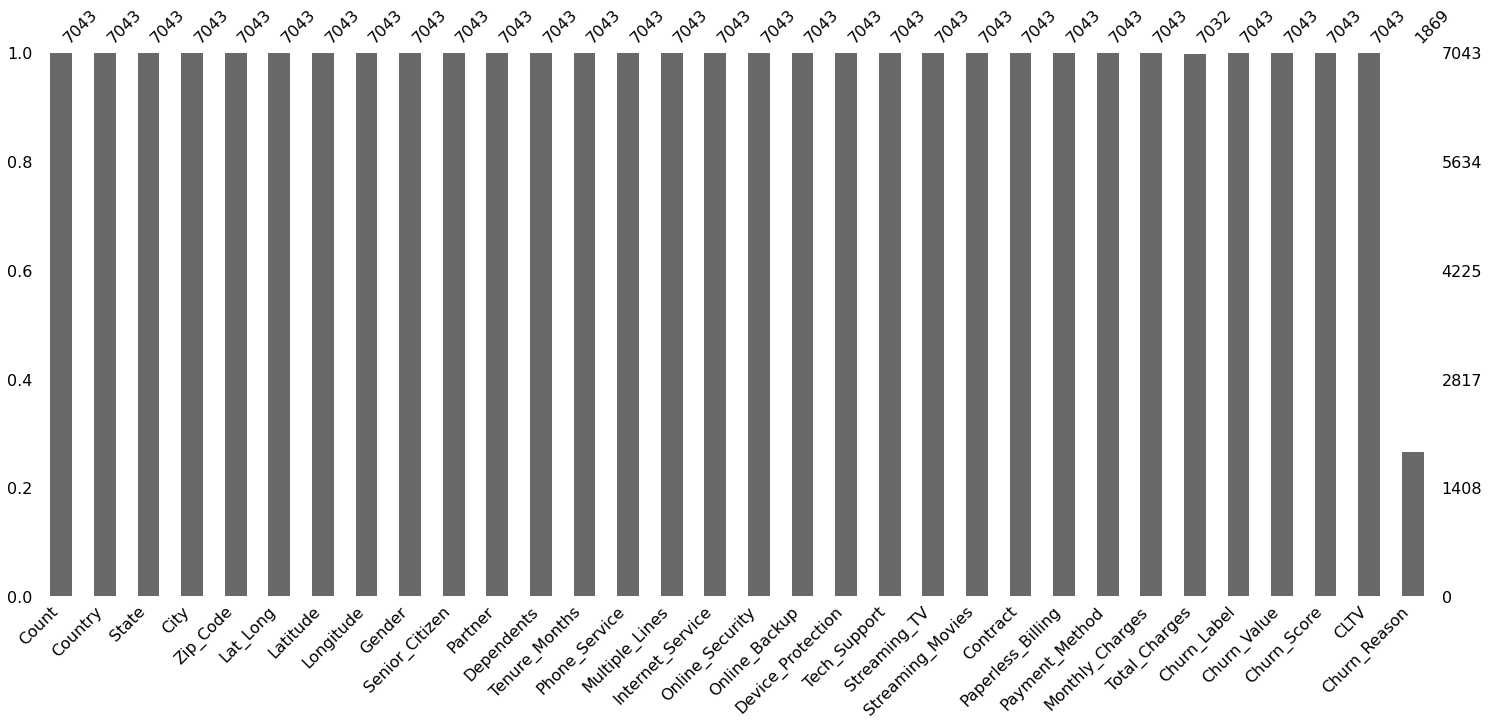

In [82]:
msno.bar(customer)  # checking missing values in columns.
                    # churn_reason have highest null values.

<AxesSubplot:>

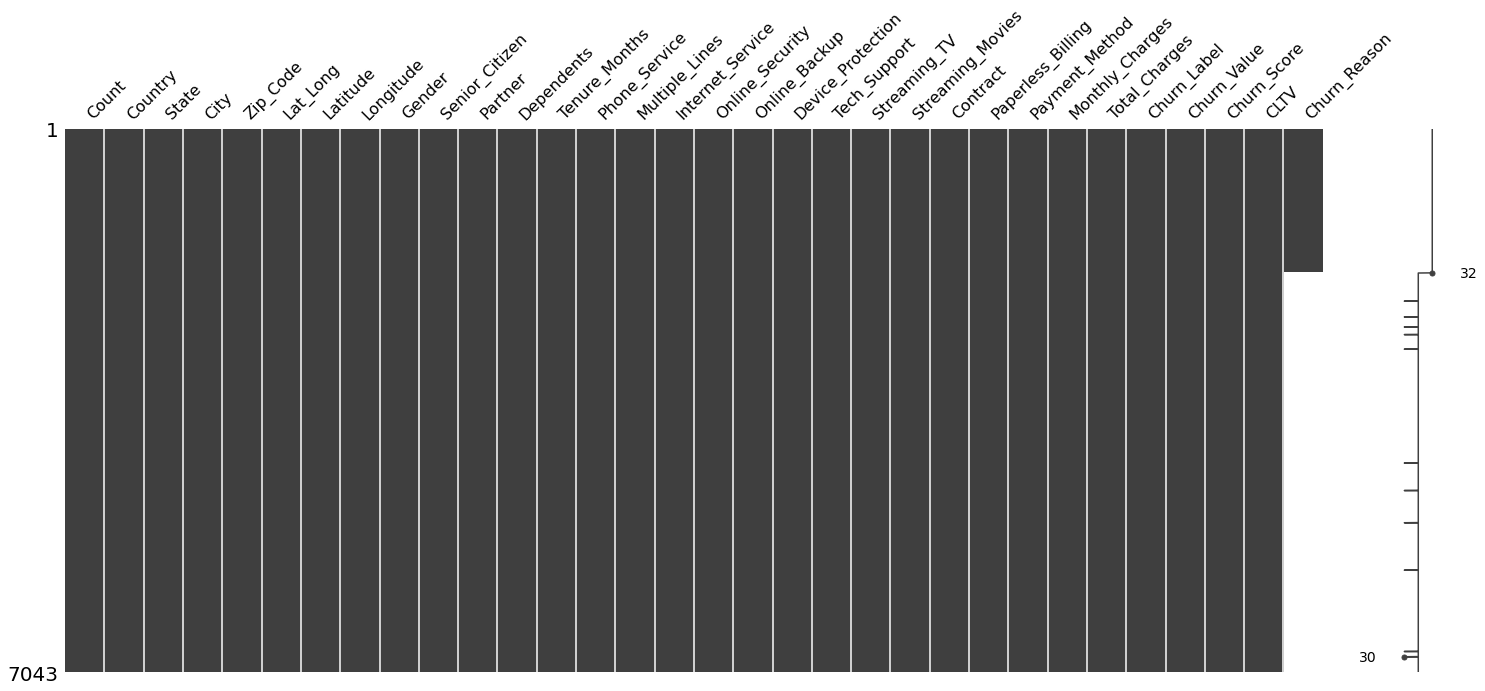

In [83]:
msno.matrix(customer)       # checking matching patterns of columns.

### Q2 Please apply appropriate statistical measures using python based on data types.

#### Standar Deviation

In [84]:
customer.Monthly_Charges.std()        # using statistical measure 'standard deviation'

30.090047097678507

#### Mode

In [85]:
customer.Monthly_Charges.mode()        # using statistical measure 'mode'

0    20.05
dtype: float64

#### Variance

In [86]:
customer.Monthly_Charges.var()         # using statistical measure 'variance'

905.4109343405107

#### Mean

In [87]:
customer.Monthly_Charges.mean()         # using statistical measure 'mean'

64.7616924605991

### Q3  What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

#### (a) Gender with percentage

In [88]:
# here i did count no. of males and females with payment_method.

customer_count = customer.Gender.groupby([customer['Payment_Method'],customer['Gender']]).count().astype('category')
customer_count

Payment_Method             Gender
Bank transfer (automatic)  Female     788
                           Male       756
Credit card (automatic)    Female     752
                           Male       770
Electronic check           Female    1170
                           Male      1195
Mailed check               Female     778
                           Male       834
Name: Gender, dtype: category
Categories (8, int64): [752, 756, 770, 778, 788, 834, 1170, 1195]

In [89]:
# here, i did find percentage of gender with payment_method

customer_percentage = (customer.groupby('Payment_Method')['Gender'].value_counts(normalize=True).reset_index(name='perc'))
customer_percentage

,Payment_Method,Gender,perc
0,Bank transfer (automatic),Female,0.510363
1,Bank transfer (automatic),Male,0.489637
2,Credit card (automatic),Male,0.505913
3,Credit card (automatic),Female,0.494087
4,Electronic check,Male,0.505285
5,Electronic check,Female,0.494715
6,Mailed check,Male,0.517370
7,Mailed check,Female,0.482630


In [90]:
# here i have taken alone percentage column for further analysis.

customerr_percentage = customer_percentage[['perc']]
customerr_percentage

,perc
0,0.510363
1,0.489637
2,0.505913
3,0.494087
4,0.505285
5,0.494715
6,0.517370
7,0.482630


Text(0.5, 1.0, 'Checking percentage of males and females using of payment_method')

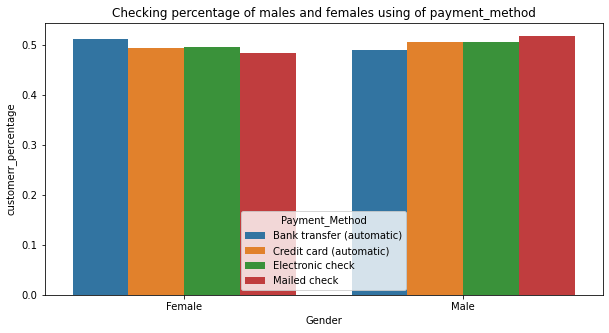

In [91]:
# here i have done analysis of gender with payment method in percentage form.

x,y,hue = "Gender","customerr_percentage","Payment_Method"

plt.figure(figsize=(10,5))

(customer[x].groupby(customer[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.barplot,"data"),x=x,y=y,hue=hue))
plt.title('Checking percentage of males and females using of payment_method')

In this analysis i have seen males are interested in "Mailed checks",

and females are more interested in doing "Bank transfer(automatic)"

#### (b) Senior citizen with percentage

In [92]:
# here i did count no. of senior citizen with payment_method.

customer_count_seniorcitizen = customer.Senior_Citizen.groupby([customer['Payment_Method'],customer['Senior_Citizen']]).count().astype('category')
customer_count_seniorcitizen

Payment_Method             Senior_Citizen
Bank transfer (automatic)  No                1311
                           Yes                233
Credit card (automatic)    No                1301
                           Yes                221
Electronic check           No                1771
                           Yes                594
Mailed check               No                1518
                           Yes                 94
Name: Senior_Citizen, dtype: category
Categories (8, int64): [94, 221, 233, 594, 1301, 1311, 1518, 1771]

In [93]:
# here, i did find percentage of senior citizen with payment_method

customer_percentage_seniorcitizen = (customer.groupby('Payment_Method')['Senior_Citizen'].value_counts(normalize=True).reset_index(name='perc'))
customer_percentage_seniorcitizen

,Payment_Method,Senior_Citizen,perc
0,Bank transfer (automatic),No,0.849093
1,Bank transfer (automatic),Yes,0.150907
2,Credit card (automatic),No,0.854796
3,Credit card (automatic),Yes,0.145204
4,Electronic check,No,0.748837
5,Electronic check,Yes,0.251163
6,Mailed check,No,0.941687
7,Mailed check,Yes,0.058313


In [94]:
# here i have taken alone percentage column for further analysis.

customerr_percentage_seniorcitizen = customer_percentage[['perc']]
customerr_percentage_seniorcitizen

,perc
0,0.510363
1,0.489637
2,0.505913
3,0.494087
4,0.505285
5,0.494715
6,0.517370
7,0.482630


Text(0.5, 1.0, 'Checking percentage of Senior_Citizen using of payment_method')

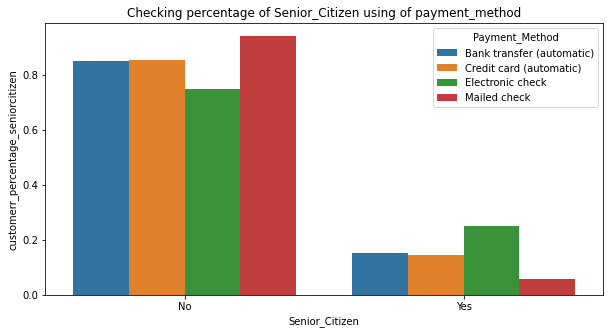

In [95]:
# here i have done analysis of senior citizen with payment method in percentage form.

x,y,hue = "Senior_Citizen","customerr_percentage_seniorcitizen","Payment_Method"

plt.figure(figsize=(10,5))

(customer[x].groupby(customer[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.barplot,"data"),x=x,y=y,hue=hue))
plt.title('Checking percentage of Senior_Citizen using of payment_method')

In this analysis, i have seen senior citizen are less interested in Payment mehod or online transaction. 

If I see "yes" or who is using payment method then they are interested in "Electronics checks".

### Q4  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

#### (a) Checking tenure month with churn_score

Text(0.5, 1.0, 'Checking months tenure with churn scores')

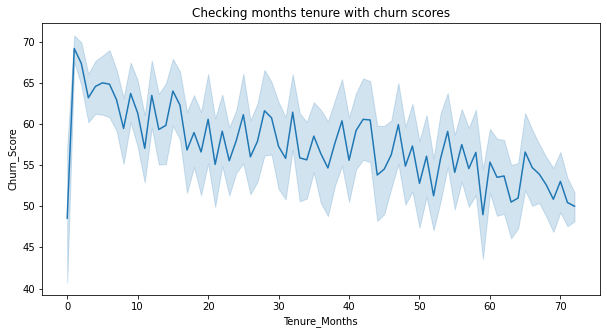

In [96]:
# here i am comparing Churn_scores with tenure_months.
# we know that churn scores are customer behaviour, desires and satisfaction.

plt.figure(figsize=(10,5))
sns.lineplot(x="Tenure_Months",y="Churn_Score",data=customer)

plt.title('Checking months tenure with churn scores')

In this analysis, we can see that as tenure months are increasing then "Churn_score" is decreasing of the customer

#### (b) Statistical measure

In [97]:
# taking two column to find skewness and statistical measures also.
customerr = customer[['Tenure_Months','Churn_Score']]

In [98]:
customerr.mean()       # checking mean

Tenure_Months    32.371149
Churn_Score      58.699418
dtype: float64

In [99]:
customerr.mode()      # checking mode

,Tenure_Months,Churn_Score
0,1,80


In [100]:
customerr.var()        # checking variance

Tenure_Months    603.168108
Churn_Score      463.331251
dtype: float64

In [101]:
customerr.std()          # checking standard deviation

Tenure_Months    24.559481
Churn_Score      21.525131
dtype: float64

#### (c) Skewness

In [102]:
# here we can see that churn_score is negative but tenure_month is positive .
customerr.skew()

Tenure_Months    0.23954
Churn_Score     -0.08984
dtype: float64

Text(0.5, 1.0, 'Churn_score skewness with mean and median ')

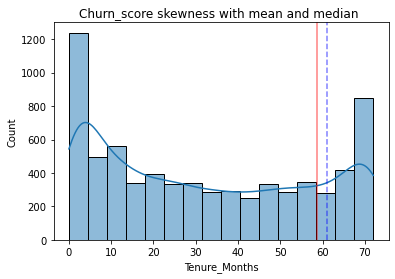

In [103]:
# here i am checking mean and medain and skewness of tenure_months
# it is going toward right side.

sns.histplot(data=customer['Tenure_Months'],kde=True)
plt.axvline(x=customer.Churn_Score.mean(),c='red',alpha=0.5,label='mean')
plt.axvline(x=customer.Churn_Score.median(),c='blue',alpha=0.5,ls='--',label='median')
plt.title('Churn_score skewness with mean and median ')

Yes, the Tenure_months is skewed to right. and the behaviour of the line is first going up then goes down and after that slightly increase.

mean and median are bit close to each other

### Q5  Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [104]:
# here converting gender column into 0 and 1.

customer_dummy = pd.get_dummies(customer["Gender"])
customer_two = pd.concat((customer_dummy,customer),axis=1)
customer_two = customer_two.drop(["Gender"],axis=1)
customer_two = customer_two.drop(["Male"],axis=1)
customer_dummmy = customer_two.rename(columns={"Female": "Gender"})

print(customer_dummmy)

      Gender  Count        Country       State          City Zip_Code  \
0          0      1  United States  California   Los Angeles    90003   
1          1      1  United States  California   Los Angeles    90005   
2          1      1  United States  California   Los Angeles    90006   
3          1      1  United States  California   Los Angeles    90010   
4          0      1  United States  California   Los Angeles    90015   
...      ...    ...            ...         ...           ...      ...   
7038       1      1  United States  California       Landers    92285   
7039       0      1  United States  California      Adelanto    92301   
7040       1      1  United States  California         Amboy    92304   
7041       1      1  United States  California  Angelus Oaks    92305   
7042       0      1  United States  California  Apple Valley    92308   

                    Lat_Long   Latitude   Longitude Senior_Citizen  ...  \
0     33.964131, -118.272783  33.964131 -118.272

In [105]:
# converting all categorical columns into binary form.

customer_dummmy['Senior_Citizen'] = customer_dummmy['Senior_Citizen'].map({'Yes':1, 'No':0})
customer_dummmy['Partner'] = customer_dummmy['Partner'].map({'Yes':1, 'No':0})
customer_dummmy['Dependents'] = customer_dummmy['Dependents'].map({'Yes':1, 'No':0})
customer_dummmy['Phone_Service'] = customer_dummmy['Phone_Service'].map({'Yes':1, 'No':0})
customer_dummmy['Multiple_Lines'] = customer_dummmy['Multiple_Lines'].map({'Yes':1, 'No':0})
customer_dummmy['Online_Security'] = customer_dummmy['Online_Security'].map({'Yes':1, 'No':0})
customer_dummmy['Online_Backup'] = customer_dummmy['Online_Backup'].map({'Yes':1, 'No':0})
customer_dummmy['Device_Protection'] = customer_dummmy['Device_Protection'].map({'Yes':1, 'No':0})
customer_dummmy['Tech_Support'] = customer_dummmy['Tech_Support'].map({'Yes':1, 'No':0})
customer_dummmy['Streaming_TV'] = customer_dummmy['Streaming_TV'].map({'Yes':1, 'No':0})
customer_dummmy['Streaming_Movies'] = customer_dummmy['Streaming_Movies'].map({'Yes':1, 'No':0})
customer_dummmy['Paperless_Billing'] = customer_dummmy['Paperless_Billing'].map({'Yes':1, 'No':0})
customer_dummmy['Churn_Label'] = customer_dummmy['Churn_Label'].map({'Yes':1, 'No':0})

In [106]:
customer_dummmy           # here is the result of dummy columns with table.

,Gender,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Senior_Citizen,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,1,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,1,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,...,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0,45,5306,NaN
7039,0,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,0,...,One year,1,Mailed check,84.80,1990.50,0,0,59,2140,NaN
7040,1,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,0,...,One year,1,Credit card (automatic),103.20,7362.90,0,0,71,5560,NaN
7041,1,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,0,...,Month-to-month,1,Electronic check,29.60,346.45,0,0,59,2793,NaN


### Q6 Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

Text(0.5, 1.0, 'Checking Gender with monthly charges')

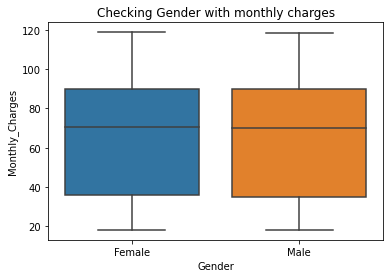

In [107]:
# doing comparison of males and females with monthly charges.

sns.boxplot(x="Gender",y="Monthly_Charges",data=customer)
plt.title('Checking Gender with monthly charges')

so, there is no difference between males and females in monthly charges it is similar to each other. or we can say that both demands are equal and median line is same.

### Q7 Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [108]:
# here i am selecting particular Los angeles city. 

customer_city = customer[customer.City == 'Los Angeles']
customer_city

,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,1,United States,California,Los Angeles,90066,"34.002028, -118.430656",34.002028,-118.430656,Female,No,...,One year,Yes,Bank transfer (automatic),104.80,3886.45,No,0,68,5319,NaN
6768,1,United States,California,Los Angeles,90067,"34.057496, -118.413959",34.057496,-118.413959,Male,No,...,Month-to-month,No,Credit card (automatic),29.30,1224.05,No,0,70,4741,NaN
6769,1,United States,California,Los Angeles,90068,"34.137411, -118.328915",34.137411,-118.328915,Female,Yes,...,Month-to-month,No,Electronic check,83.85,2310.20,No,0,35,5907,NaN
6770,1,United States,California,Los Angeles,90071,"34.052917, -118.255178",34.052917,-118.255178,Female,No,...,Month-to-month,Yes,Electronic check,103.65,3988.50,No,0,47,2511,NaN


#### (a) minimum total charges for Los Angeles city

In [109]:
# finding minimum total charge in los angeles city which is 18.8 .

min_total_charge = customer_city.loc[customer_city['Total_Charges'] == customer_city['Total_Charges'].min(),['City','Total_Charges']]
min_total_charge

,City,Total_Charges
3087,Los Angeles,18.8


#### (b) zip code has the maximum total charges.

In [110]:
# finding maximum total charge with zip_code. which is 8375.05 .

max_total_charge = customer_city.loc[customer_city['Total_Charges'] == customer_city['Total_Charges'].max(),['Zip_Code','Total_Charges']]
max_total_charge

,Zip_Code,Total_Charges
3117,90044,8375.05


### Q8 Please find which payment method has the highest churn score and which has the lowest churn score.

Text(0.5, 1.0, 'Churn_score with payment method')

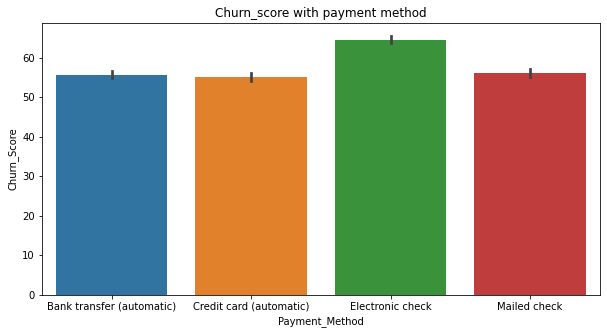

In [111]:
# here i am comparing and finding highest and lowest churn_score with payment method.

plt.figure(figsize=(10,5))
sns.barplot(x="Payment_Method",y="Churn_Score",data=customer)
plt.title('Churn_score with payment method')

Electronic check gets the highest churn_score which is above the 60.

Credit_card(automatic) gets the lowest churn_score which is approx 50.

### Q9 Please create an appropriate plot to check the count of payment methods and explain it.


#### (a) mailed check

In [112]:
# selecting particular mailed check in the table and finding result.

customer_mailed = customer[customer.Payment_Method == 'Mailed check']

In [113]:
customer_mailed.Payment_Method.count()         # finding count with code.

1612

<AxesSubplot:xlabel='Payment_Method', ylabel='count'>

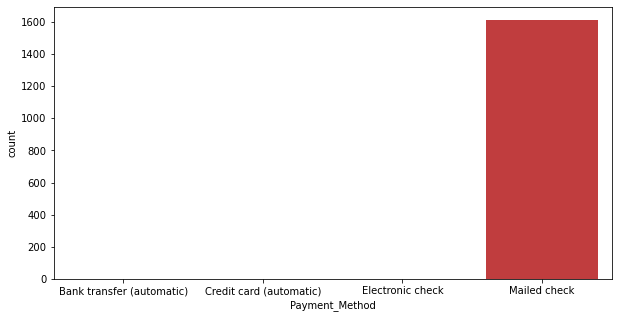

In [114]:
# and this is graphical representation of count.
# the mailed_check count is 1612.

plt.figure(figsize=(10,5))
sns.countplot(x="Payment_Method", data=customer_mailed)

#### electronic check

In [115]:
# selecting particular electronic check in the table and finding result.

customer_electronic_check = customer[customer.Payment_Method == 'Electronic check']  

In [116]:
customer_electronic_check.Payment_Method.count()         # finding count with code.

2365

<AxesSubplot:xlabel='Payment_Method', ylabel='count'>

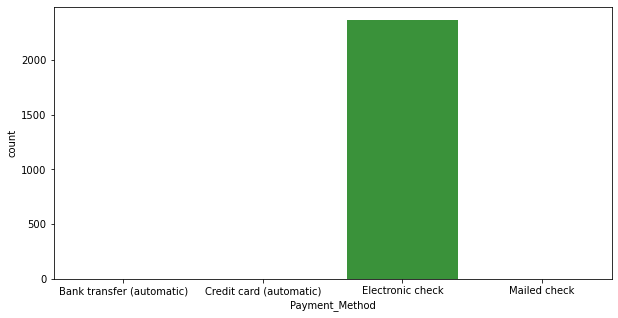

In [117]:
# and this is graphical representation of count.
# the electronic_check count is 2365.

plt.figure(figsize=(10,5))
sns.countplot(x="Payment_Method", data=customer_electronic_check)

#### bank transfer

In [118]:
# selecting particular bank transfer in the table and finding result.

customer_bank_transfer = customer[customer.Payment_Method == 'Bank transfer (automatic)']   

In [119]:
customer_bank_transfer.Payment_Method.count()         # finding count with code.

1544

<AxesSubplot:xlabel='Payment_Method', ylabel='count'>

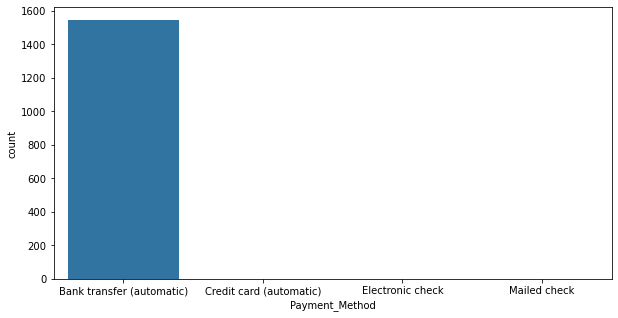

In [120]:
# and this is graphical representation of count.
# the bank_transfer count is 1544.

plt.figure(figsize=(10,5))
sns.countplot(x="Payment_Method", data=customer_bank_transfer)

#### credit card

In [121]:
# selecting particular credit card in the table and finding result.

customer_credit_card = customer[customer.Payment_Method == 'Credit card (automatic)']

In [122]:
customer_credit_card.Payment_Method.count()         # finding count with code.

1522

<AxesSubplot:xlabel='Payment_Method', ylabel='count'>

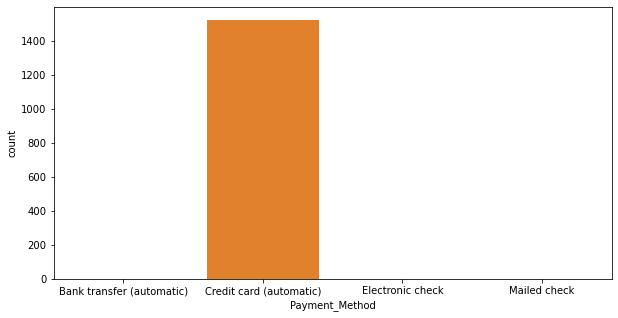

In [123]:
# and this is graphical representation of count.
# the credit_card count is 1522.

plt.figure(figsize=(10,5))
sns.countplot(x="Payment_Method", data=customer_credit_card)

## Q10  Please create an appropriate plot to see the relationship between monthly charges and total charges.

#### scatter plot

Text(0.5, 1.0, 'Monthly charge with Total charge')

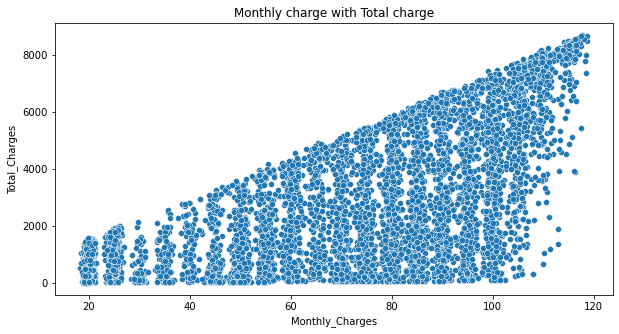

In [124]:
# here i am taking monthly_charge and total_charge doing comparison.

plt.figure(figsize=(10,5))
sns.scatterplot(x="Monthly_Charges",y="Total_Charges", data=customer)
plt.title('Monthly charge with Total charge')

so, we can see here there is so many plans in monthly charge as well as total charge

the highest total_charge is above 8000

the lowest monthly_charge is 20

#### pair plot

In [125]:
customer_tenure = customer[['Monthly_Charges','Total_Charges']]      # selecting two columns for analysis.

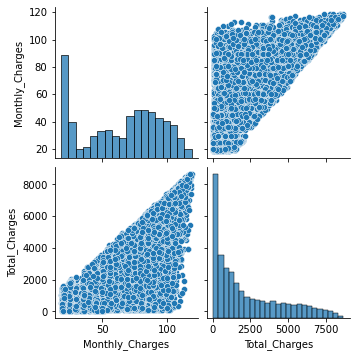

In [126]:
# doing comparison by using of month and total charges.

sns.pairplot(customer_tenure)

basically, here i am using pair plot to see relationship with trend also.

the "monthly_charge" --   pattern is sometimes go up and down. because it may vary person to person some people like to charge on monthly basis and they like small plan.

but "total_charge" --   pattern is something like going down as charges is increasing. so, we can predict here or we can take real example most of the people is not interested in paying of whole amount in one go.